**Importing Essential Library**

In [60]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
%matplotlib inline
import numpy as np
import seaborn as sn
from sklearn.metrics import confusion_matrix , classification_report
import warnings
warnings.filterwarnings("ignore")

**Loading the Dataset**

In [42]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

**Data Exploration**

In [43]:
len(X_train)

60000

In [44]:
len(X_test)

10000

In [45]:
X_train[0].shape

(28, 28)

In [46]:
X_train.shape

(60000, 28, 28)

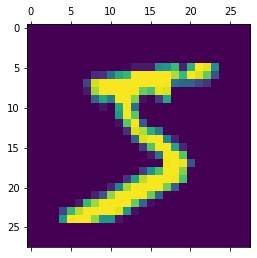

In [47]:
plt.matshow(X_train[0])

In [48]:
y_train[0]

5

**Data Normalization**

In [49]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [50]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [51]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

**Building Model**

In [52]:
model = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [53]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1666 - accuracy: 0.9499
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0557 - accuracy: 0.9832
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0359 - accuracy: 0.9888
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0262 - accuracy: 0.9920
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0170 - accuracy: 0.9944


**Model Evaluation**

In [58]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0512 - accuracy: 0.9845


[0.05121742561459541, 0.984499990940094]

In [69]:
y_pred = model.predict(X_test)
y_pred[:5]

313/313 [==============================] - 0s 2ms/step


array([[8.7489642e-04, 2.3615719e-03, 5.3837657e-02, 6.8563426e-01,
        5.1838084e-04, 1.4090646e-04, 4.5336237e-09, 9.9999928e-01,
        1.8981509e-03, 4.5394817e-01],
       [2.1334392e-01, 8.9245218e-01, 1.0000000e+00, 7.8197243e-03,
        3.7363996e-08, 4.6778132e-05, 1.6389923e-01, 2.3659469e-07,
        2.9161086e-02, 3.2183029e-02],
       [4.4926461e-03, 9.9994421e-01, 1.4461281e-02, 8.9432106e-05,
        8.1792176e-02, 1.2756183e-03, 2.6988161e-03, 1.3659324e-01,
        1.2893906e-01, 7.6354467e-03],
       [9.9999511e-01, 3.1665373e-03, 3.5161232e-03, 2.3062781e-03,
        8.9138991e-04, 8.8059908e-04, 2.6149762e-01, 8.3006648e-03,
        3.9163409e-04, 1.2694836e-03],
       [3.5199612e-02, 1.5008803e-02, 4.7386466e-03, 1.4535344e-04,
        9.9999964e-01, 2.8249354e-03, 5.8341652e-02, 4.0942710e-03,
        1.5830340e-02, 9.2078668e-01]], dtype=float32)

In [67]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[7, 2, 1, 0, 4]

**Classification Report**

In [68]:
print("Classification Report: \n \n", classification_report(y_test, y_classes))

Classification Report: 
 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.96      1.00      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.97      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



**Confusion Matrix**

Text(69.0, 0.5, 'Truth')

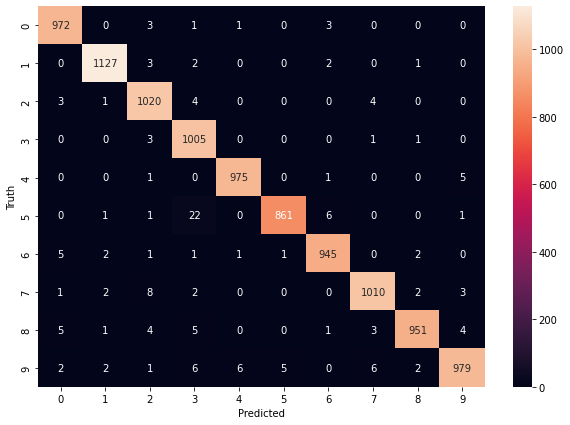

In [62]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_classes)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')